In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn; sn.set()
from scipy.stats import multivariate_normal as mvn

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
D = 2
C = 3
N = int(C*3e3)
X0 = np.random.randn((N//C),D)+np.array([2,2])
X1 = np.random.randn((N//C),D)+np.array([0,-2])
X2 = np.random.randn((N//C),D)+np.array([-2,2])


X_train = np.vstack((X0,X1,X2))
y_train = np.array([0]*(N//C)+[1]*(N//C)+[2]*(N//C))

print (X_train)
print (y_train)
print (X_train.shape)
print (y_train.shape)

[[-0.06225838  2.44027586]
 [ 3.07432401  2.19024376]
 [ 0.90001781  3.32154195]
 ...
 [-1.25107306  0.89929272]
 [ 0.62019625  1.01278553]
 [-2.86459361  3.10058061]]
[0 0 0 ... 2 2 2]
(9000, 2)
(9000,)


In [ ]:
D = 2
C = 3
N = int(C*5e2)
X0 = np.random.randn((N//C),D)+np.array([2,2])
X1 = np.random.randn((N//C),D)+np.array([0,-2])
X2 = np.random.randn((N//C),D)+np.array([-2,2])


X_test = np.vstack((X0,X1,X2))
y_test = np.array([0]*(N//C)+[1]*(N//C)+[2]*(N//C))

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(9000, 2)
(9000,)
(1500, 2)
(1500,)


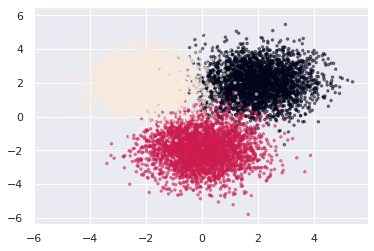

In [ ]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5, s=6)


In [ ]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y
    
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [ ]:
knn=KNNClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_hat_train = knn.predict(X_train,50)
y_hat_test = knn.predict(X_test,50)

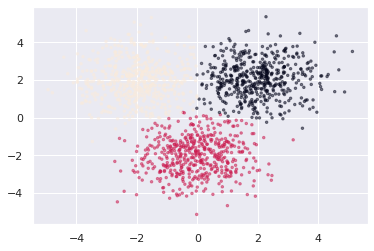

In [ ]:
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1],c=y_hat_test, alpha=0.5, s=6)

In [ ]:
accuracy(y_train,y_hat_train)

0.9733333333333334

In [ ]:
accuracy(y_test,y_hat_test)

0.9686666666666667

In [ ]:
X_vis=np.random.uniform(-6,6,(int(N*10),D))

In [ ]:
y_hat_vis=knn.predict(X_vis,150)

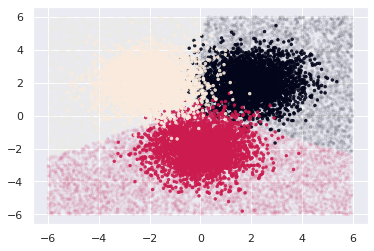

In [ ]:
plt.figure()
plt.scatter(X_vis[:,0],X_vis[:,1],c=y_hat_vis, alpha=0.05, s=6)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha=0.86, s=6)

Text(0.5, 57.5, 'Predicted Labels')

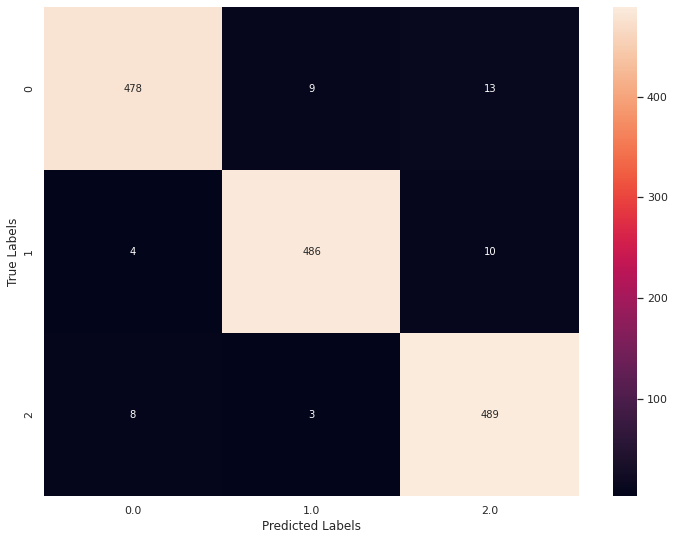

In [ ]:
plt.figure(figsize=(12,9))
y_actual = pd.Series(y_test, name="Actual")
y_pred = pd.Series(y_hat_test, name="Predicted")
cm = pd.crosstab(y_actual, y_pred)
ax = sn.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')